# 환경데이터 분석 (기말고사 대체 과제)

In [83]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 파일 읽어오기

weather.csv 는 cp949 인코딩이라서 그냥 utf-8로 read 하면 오류 발생함.

In [84]:
air_df = pd.read_csv("./measuredData.csv")

weather_df = pd.read_csv("./weather.csv", encoding="cp949")

## 2. 기본 정보 및 기초 통계량 확인

In [85]:
display(air_df.head())
print(air_df.shape)
display(weather_df.head())
print(weather_df.shape)

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2021-10-01 01,0.003,0.6,0.001,0.042,35.0,20.0
1,2021-10-01 02,0.003,0.5,0.003,0.031,31.0,16.0
2,2021-10-01 03,0.003,0.4,0.005,0.023,25.0,13.0
3,2021-10-01 04,0.003,0.4,0.002,0.025,25.0,13.0
4,2021-10-01 05,0.003,0.4,0.002,0.023,27.0,15.0


(744, 7)


,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,108,서울,2021-10-01 1:00,18.7,NaN,1.0,85
1,108,서울,2021-10-01 2:00,18.3,NaN,0.3,89
2,108,서울,2021-10-01 3:00,17.7,NaN,2.0,92
3,108,서울,2021-10-01 4:00,17.4,NaN,1.0,91
4,108,서울,2021-10-01 5:00,17.2,NaN,1.3,94


(744, 7)


## 3. 한글 컬럼명 영문명으로 변경

In [86]:
air_df.rename(columns={
	"날짜" : "date",
	"아황산가스" : "SO2",
	"일산화탄소" : "CO",
	"오존" : "O3",
	"이산화질소" : "NO2"
	}, inplace=True)

weather_df.rename(columns={
	"지점" : "center_num",
	"지점명" : "center",
	"일시" : "date",
	"기온(°C)" : "temperature",
	"강수량(mm)" : "rain",
	"풍속(m/s)" : "wind",
	"습도(%)" : "humid"
}, inplace=True)

display(air_df.head())
display(weather_df.head())

,date,SO2,CO,O3,NO2,PM10,PM2.5
0,2021-10-01 01,0.003,0.6,0.001,0.042,35.0,20.0
1,2021-10-01 02,0.003,0.5,0.003,0.031,31.0,16.0
2,2021-10-01 03,0.003,0.4,0.005,0.023,25.0,13.0
3,2021-10-01 04,0.003,0.4,0.002,0.025,25.0,13.0
4,2021-10-01 05,0.003,0.4,0.002,0.023,27.0,15.0


,center_num,center,date,temperature,rain,wind,humid
0,108,서울,2021-10-01 1:00,18.7,NaN,1.0,85
1,108,서울,2021-10-01 2:00,18.3,NaN,0.3,89
2,108,서울,2021-10-01 3:00,17.7,NaN,2.0,92
3,108,서울,2021-10-01 4:00,17.4,NaN,1.0,91
4,108,서울,2021-10-01 5:00,17.2,NaN,1.3,94


## 4. 데이터 타입 변경

### 4-1. 데이터 병합 및 불필요한 컬럼 삭제

두 데이터는 자정을 표기하는 방식이 다름.  
2021년 10월 1일 자정을  
air_df는 **2021-10-01 24**로 표기하고  
weather_df는 **2021-10-02 0:00**으로 표기함  

따라서 날짜를 기준으로 병합하려면 처리를 해야 하는데, **번거롭다.**  
24시든 00시든 같은 날짜와 같은 시간이기 때문에 index를 기준으로 join하는 방식을 사용하기로 함.

In [87]:
weather_df.drop(columns=["date", "center_num", "center"], inplace=True)
df = air_df.join(weather_df)

### 4-2. 데이터 타입 확인

In [88]:
display(df.dtypes)

date            object
SO2            float64
CO             float64
O3             float64
NO2            float64
PM10           float64
PM2.5          float64
temperature    float64
rain           float64
wind           float64
humid            int64
dtype: object

### 4-3. date 컬럼 date 타입으로 변경

In [89]:
df["hour"] = df["date"].str[-2:]
df["date"] = pd.to_datetime(df["date"].str[:10]) # 시간 제외하고 datetime 타입으로 변경
df["humid"] = df["humid"].astype("float64")

# 컬럼 순서 변경
df = df[[
	"date",
	"hour",
	"SO2",
	"CO",
	"O3",
	"NO2",
	"PM10",
	"PM2.5",
	"temperature",
	"rain",
	"wind",
	"humid"
	]]
display(df.head())
print(df.dtypes)

,date,hour,SO2,CO,O3,NO2,PM10,PM2.5,temperature,rain,wind,humid
0,2021-10-01,01,0.003,0.6,0.001,0.042,35.0,20.0,18.7,NaN,1.0,85.0
1,2021-10-01,02,0.003,0.5,0.003,0.031,31.0,16.0,18.3,NaN,0.3,89.0
2,2021-10-01,03,0.003,0.4,0.005,0.023,25.0,13.0,17.7,NaN,2.0,92.0
3,2021-10-01,04,0.003,0.4,0.002,0.025,25.0,13.0,17.4,NaN,1.0,91.0
4,2021-10-01,05,0.003,0.4,0.002,0.023,27.0,15.0,17.2,NaN,1.3,94.0


date           datetime64[ns]
hour                   object
SO2                   float64
CO                    float64
O3                    float64
NO2                   float64
PM10                  float64
PM2.5                 float64
temperature           float64
rain                  float64
wind                  float64
humid                 float64
dtype: object


## 5. 결측치 확인 및 처리

### 5-1. 결측치 확인

In [90]:
display(df.isna().sum())

date             0
hour             0
SO2              6
CO               6
O3              32
NO2              6
PM10             6
PM2.5            6
temperature      0
rain           644
wind             0
humid            0
dtype: int64

### 5-2. 결측치 처리

**대기질 관련 컬럼들은 이전값으로 채우기로 함.**  
연속적으로 결측치인 부분이 많을 경우 시간별 평균치로 채우려고 했으나, 연속적으로 결측치인 부분이 많지 않음.  

In [91]:
df[["SO2", "CO", "O3", "NO2", "PM10", "PM2.5"]] = df[[
	"SO2",
	"CO",
	"O3",
	"NO2",
	"PM10",
	"PM2.5"
	]].fillna(method="pad")

/tmp/ipykernel_75280/2720941380.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ]].fillna(method="pad")


강수량 데이터는 대부분이 결측치임.  
하지만 결측치를 모두 0으로 처리하는 것은 맞지 않다고 판단함.  
따라서 강수량과의 상관관계를 파악하여 결측치를 채우려 함.

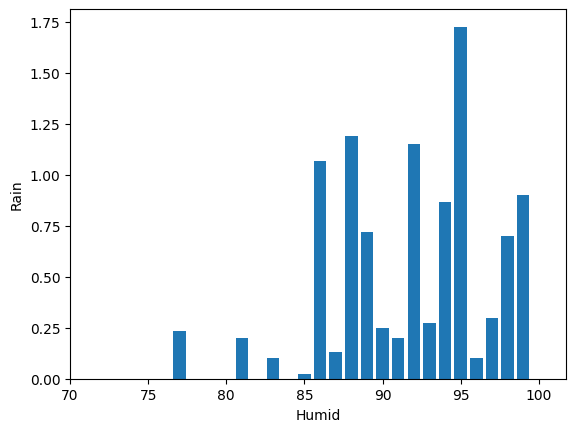

In [92]:
humid_rain = df.groupby("humid")["rain"].mean()
plt.bar(humid_rain.index, humid_rain.values)
plt.xlabel("Humid")
plt.ylabel("Rain")
plt.xlim(70)
plt.show()

In [93]:
df_high_humid = df[df["humid"] >= 85]

# 습도별 평균 강수량
humid_rain_mean = df_high_humid.groupby("humid")["rain"].mean()

# 결측치 채우기
mask = (df["humid"] >= 85) & (df["rain"].isna())
df.loc[mask, "rain"] = df.loc[mask, "humid"].map(humid_rain_mean)

df["rain"] = df["rain"].fillna(0)

display(df.isna().sum())

date           0
hour           0
SO2            0
CO             0
O3             0
NO2            0
PM10           0
PM2.5          0
temperature    0
rain           0
wind           0
humid          0
dtype: int64

## 6. 상관계수 함수를 이용하여 요소별 상관관계 분석

In [100]:
corr = df.corr()
display(corr)
display(corr["PM10"].sort_values(ascending=False))

,date,hour,SO2,CO,O3,NO2,PM10,PM2.5,temperature,rain,wind,humid
date,1.000000e+00,-9.468518e-15,0.230076,0.288951,-0.219355,0.436776,0.183330,0.211799,-0.617404,-0.189181,-0.237988,-0.419973
hour,-9.468518e-15,1.000000e+00,0.169792,0.086160,0.294369,0.055214,0.125831,0.083894,0.193079,-0.027222,0.116108,-0.272284
SO2,2.300760e-01,1.697916e-01,1.000000,0.397428,0.206836,0.260190,0.491339,0.480350,0.055479,-0.078816,-0.059069,-0.205275
CO,2.889509e-01,8.615959e-02,0.397428,1.000000,-0.375636,0.806109,0.551405,0.644981,-0.198151,-0.025059,-0.460056,0.070697
O3,-2.193550e-01,2.943687e-01,0.206836,-0.375636,1.000000,-0.583299,0.167255,0.089991,0.445493,-0.060795,0.422374,-0.428589
NO2,4.367760e-01,5.521409e-02,0.260190,0.806109,-0.583299,1.000000,0.375164,0.493969,-0.317340,-0.040974,-0.483363,0.086609
PM10,1.833303e-01,1.258309e-01,0.491339,0.551405,0.167255,0.375164,1.000000,0.910661,-0.047938,-0.061507,-0.023128,-0.181923
PM2.5,2.117992e-01,8.389416e-02,0.480350,0.644981,0.089991,0.493969,0.910661,1.000000,-0.049055,-0.010864,-0.155667,-0.038005
temperature,-6.174036e-01,1.930786e-01,0.055479,-0.198151,0.445493,-0.317340,-0.047938,-0.049055,1.000000,0.057920,0.239709,0.175256
rain,-1.891809e-01,-2.722232e-02,-0.078816,-0.025059,-0.060795,-0.040974,-0.061507,-0.010864,0.057920,1.000000,-0.017795,0.329331


PM10           1.000000
PM2.5          0.910661
CO             0.551405
SO2            0.491339
NO2            0.375164
date           0.183330
O3             0.167255
hour           0.125831
wind          -0.023128
temperature   -0.047938
rain          -0.061507
humid         -0.181923
Name: PM10, dtype: float64

## 7. 히스토그램으로 시각화

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'CO'}>],
       [<Axes: title={'center': 'O3'}>, <Axes: title={'center': 'NO2'}>,
        <Axes: title={'center': 'PM10'}>],
       [<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'humid'}>, <Axes: >]], dtype=object)

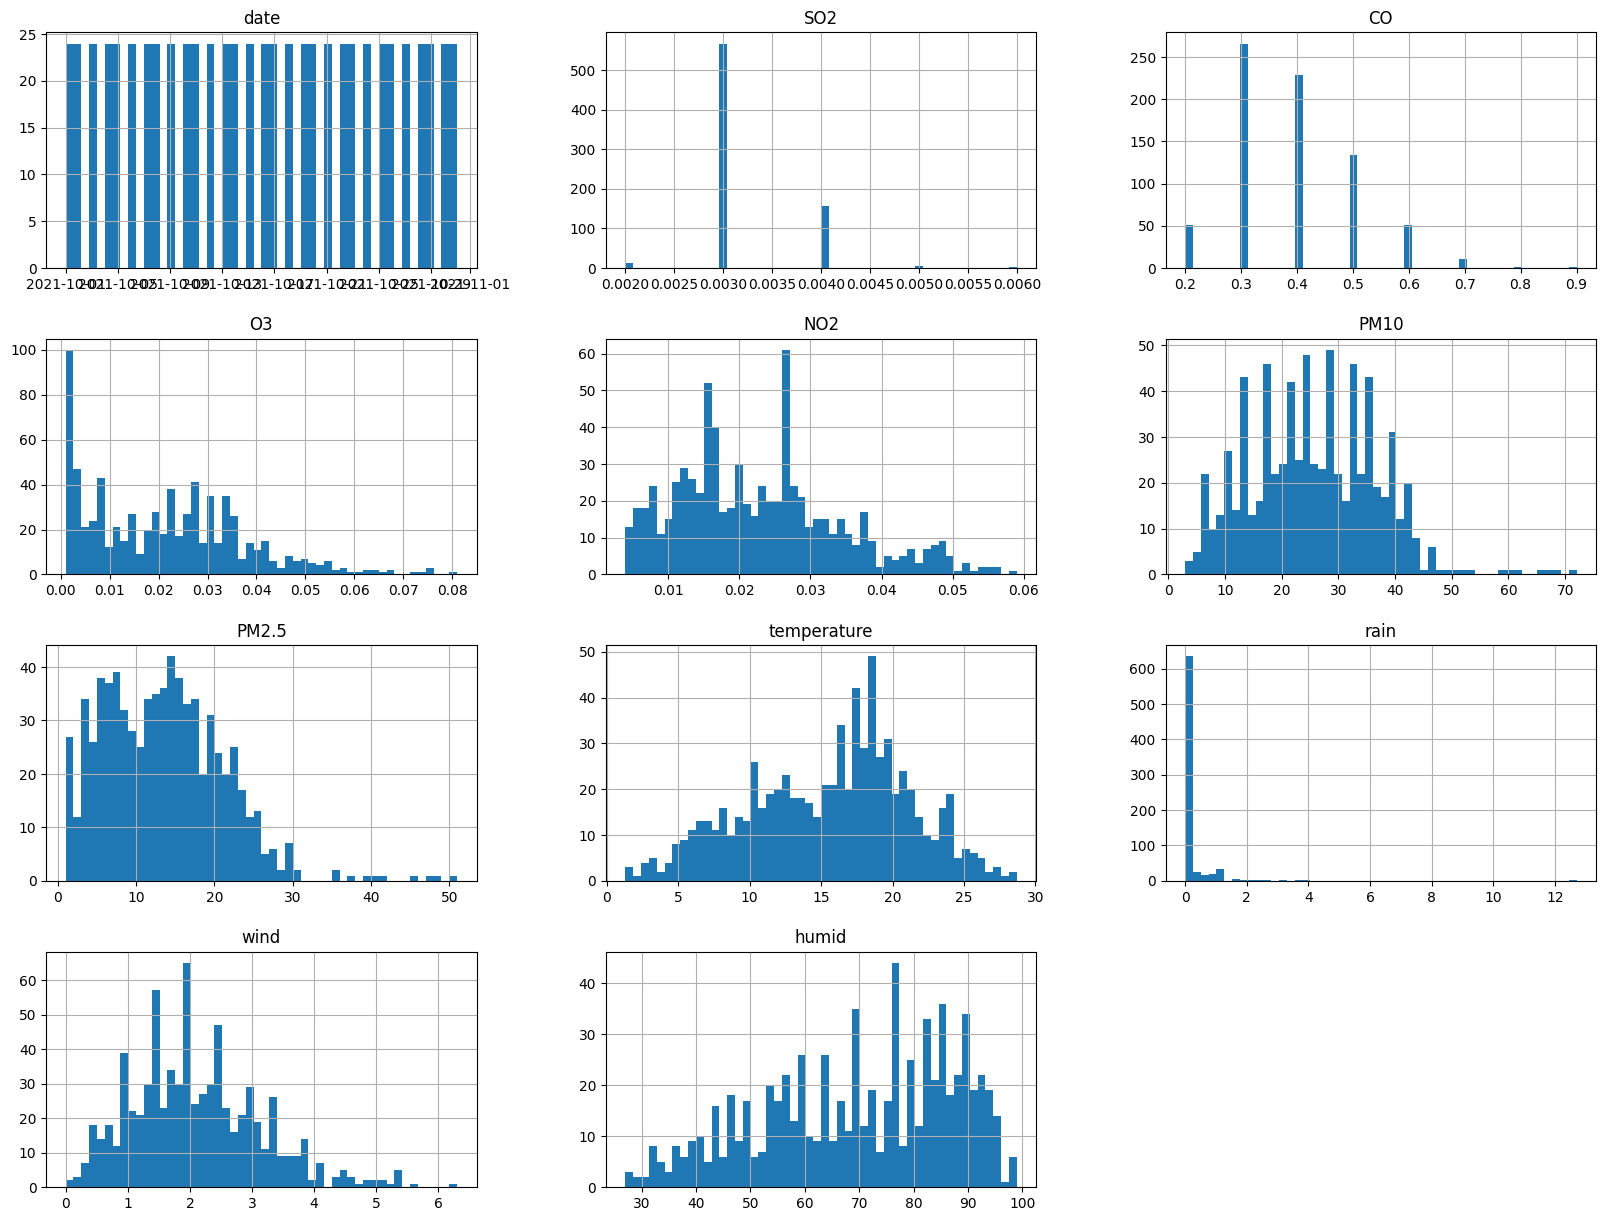

In [95]:
df.hist(bins=50, figsize=(20,15))

## 8. 막대그래프로 일별 현황 그래프 출력

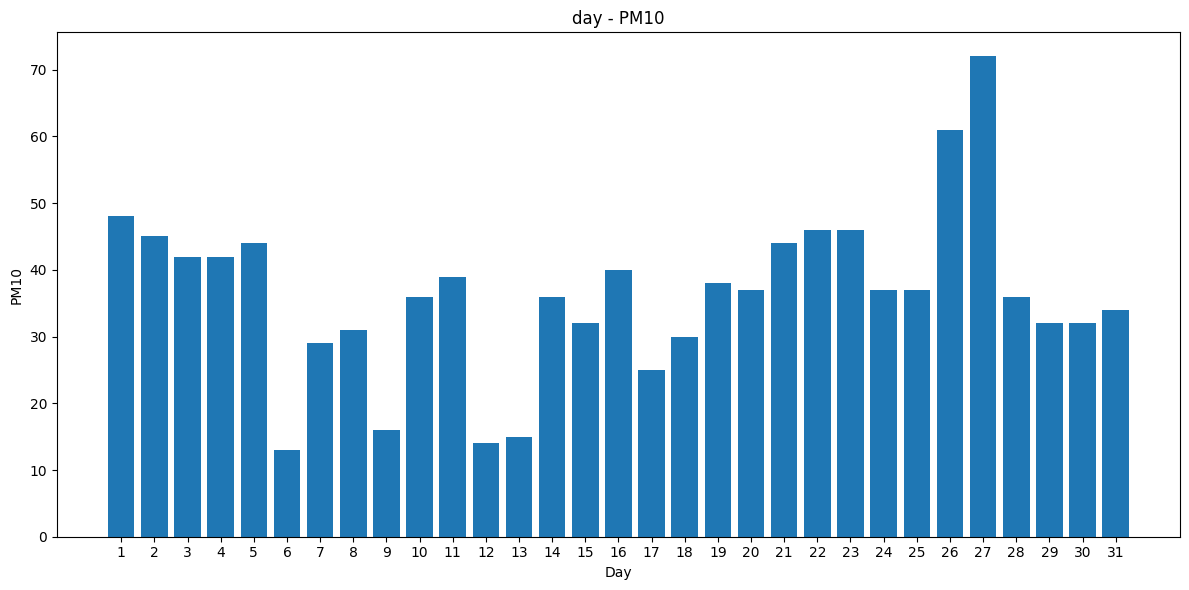

In [96]:
plt.figure(figsize=(12,6))
plt.bar(df["date"].dt.day, df["PM10"])
plt.title("day - PM10")
plt.xticks(range(1,32))
plt.xlabel("Day")
plt.ylabel("PM10")

plt.tight_layout()
plt.show()

## 9. 히트맵으로 상관관계 시각화

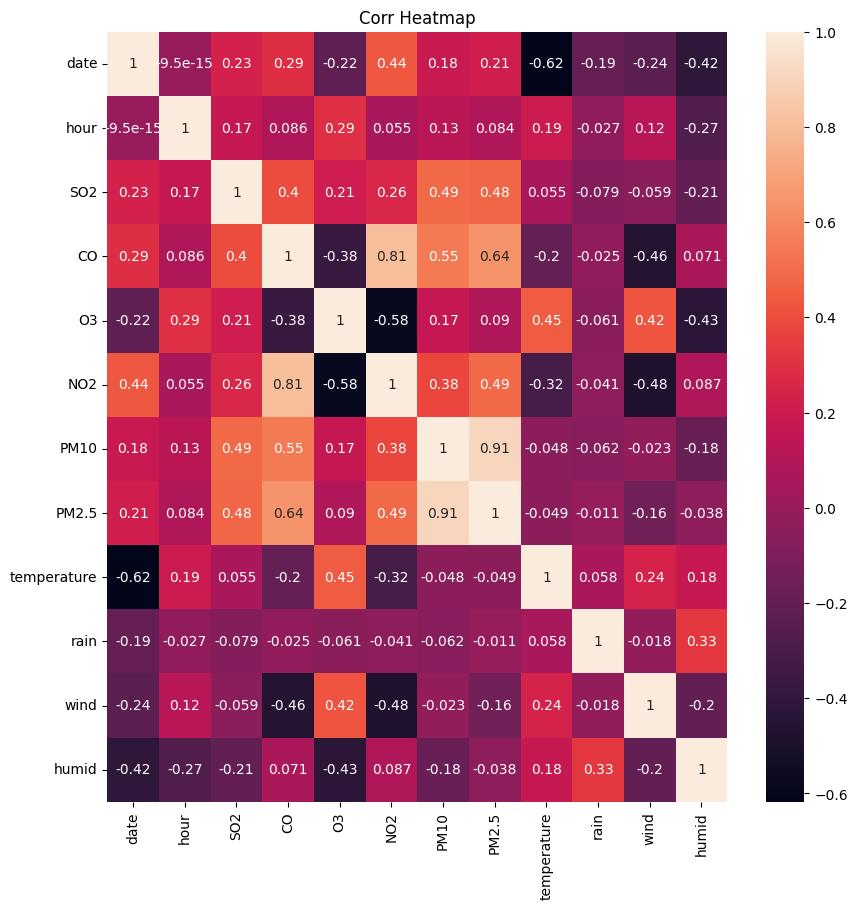

In [97]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.title("Corr Heatmap")
plt.show()

## 10. 산점도 그래프로 온도와 미세먼지(PM10) 확인

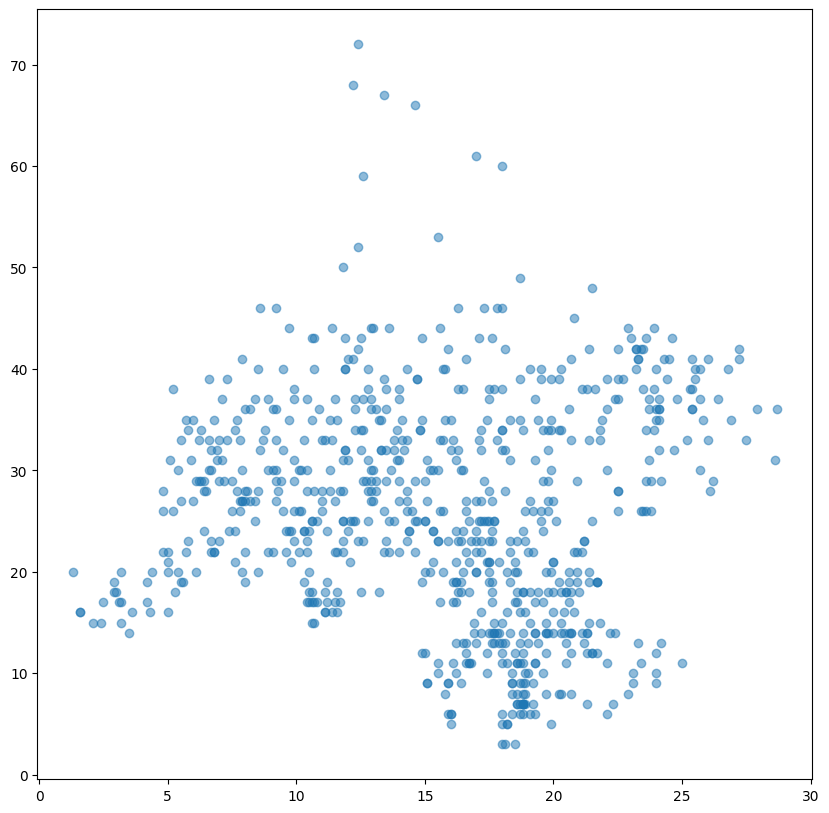

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(df["temperature"], df["PM10"], alpha=0.5)
plt.show()

## 11. 미세먼지(PM10) 과 초미세먼지(PM2.5) 관계를 산점도 그래프로 확인

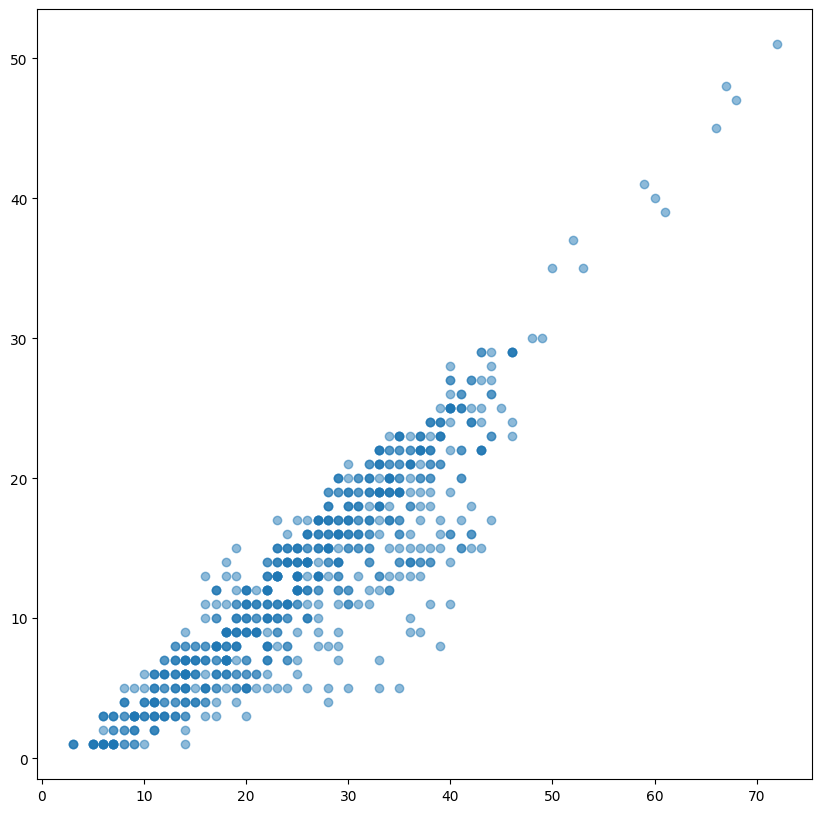

In [99]:
plt.figure(figsize=(10,10))
plt.scatter(df["PM10"], df["PM2.5"], alpha=0.5)
plt.show()

## 12. 데이터 분석 정리